# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Ananda Nur Zahra Salsabila
- **Email:** nzsananda@gmail.com
- **ID Dicoding:** anandanzs

## Menentukan Pertanyaan Bisnis

Terdapat 3 pertanyaan bisnis, yaitu:
- State mana yang paling banyak dan paling sedikit melakukan pembelian produk?
- Bagaimana tingkat kepuasan pelanggan tercermin dari skor ulasan?
- Apakah terdapat pengaruh bulan dan tertentu terhadap pembelian?

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install streamlit

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.tsa.seasonal import seasonal_decompose #kepake

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import files

customer = files.upload()
review = files.upload()
order = files.upload()

Saving customers_dataset.csv to customers_dataset.csv


Saving order_reviews_dataset.csv to order_reviews_dataset.csv


Saving orders_dataset.csv to orders_dataset.csv


**Tabel Customer**

In [ ]:
customer_df = pd.read_csv("customers_dataset.csv")
customer_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


**Tabel Review**

In [ ]:
review_df = pd.read_csv("order_reviews_dataset.csv")
review_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


**Tabel Order**

In [ ]:
order_df = pd.read_csv("orders_dataset.csv")
order_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


### Assessing Data

**Tabel Customer**

Memeriksa dan mencetak *missing value* di setiap kolom

In [ ]:
print(customer_df.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


> Berdasarkan output diatas, dapat disimpulkan bahwa pada tabel customer tidak terdapat *missing value*

memeriksa dan mencetak nomor duplikat

In [ ]:
print(customer_df.duplicated().sum())

0




> Berdasarkan output diatas, dapat disimpulkan bahwa Tabel Customer tidak memiliki duplikat.



**Tabel Review**

Memeriksa dan mencetak missing value di setiap kolom

In [ ]:
print(review_df.isnull().sum())

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


> Berdasarkan output diatas, dapat disimpulkan bahwa pada tabel review terdapat *missing value* pada review_comment_title sebanyak 87656 dan review_comment_message sebanyak 58247. Sedangkan, kolom yang lain tidak terdapat *missing value*

Memeriksa dan mencetak nomor duplikat

In [ ]:
print(review_df.duplicated().sum())

0


> Berdasarkan output diatas, dapat disimpulkan bahwa pada tabel review tidak terdapat duplikat.

**Tabel Order**

Memeriksa dan mencetak missing value di setiap kolom

In [ ]:
print(order_df.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


>Berdasarkan output diatas, dapat disimpulkan bahwa pada tabel order terdapat *missing value* pada kolom order_approved_at sebanyak 160, order_delivered_carrier_date sebanyak 1783, dan order_delivered_customer_date sebanyak 2965. Untuk kolom lainnya tidak terdapat *missing value*.

Memeriksa dan mencetak nomor duplikat

In [ ]:
print(order_df.duplicated().sum())

0


>Berdasarkan output diatas, dapat disimpulkan bahwa tabel order tidak memiliki duplikat.

### Cleaning Data

**Tabel Customer**

Tabel Customer tidak diperlukan cleaning data karena tidak terdapat missing value dan duplicate data

**Tabel Review**

Mengatasi missing values menggunakan metode imputation

In [ ]:
review_df['review_comment_title'].fillna('', inplace=True)
review_df['review_comment_message'].fillna('', inplace=True)

Memeriksa dan menangani duplikat

In [ ]:
review_df.drop_duplicates(inplace=True)

Memeriksa nilai yang hilang setelah melakukan *Cleansing Data*

In [ ]:
print(review_df.isnull().sum())

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


Setelah melakukan *cleansing data* kolom yang terdapat pada tabel review sudah tidak memiliki *missing value*.

Menampilkan Data Setelah Melakukan *Cleansing Data*

In [ ]:
print(review_df.head())

                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                        
1             5                        
2             5                        
3             5                        
4             5                        

                              review_comment_message review_creation_date  \
0                                                     2018-01-18 00:00:00   
1                                                     2018-03-10 00:00:00   
2                                                     2018-02-17 00:00:00   
3           

**Tabel Order**

Mengatasi missing values menggunakan metode imputation

In [ ]:
order_df['order_approved_at'].fillna(method='ffill', inplace=True)
order_df['order_delivered_carrier_date'].fillna(method='ffill', inplace=True)
order_df['order_delivered_customer_date'].fillna(method='ffill', inplace=True)

Memeriksa dan menangani duplikat

In [ ]:
order_df.drop_duplicates(inplace=True)

Memeriksa nilai yang hilang setelah melakukan Cleansing Data

In [ ]:
print(order_df.isnull().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


> Setelah melakukan cleansing data kolom yang terdapat pada tabel order sudah tidak memiliki missing value.

Menampilkan Data Setelah Melakukan *Cleansing Data*

In [ ]:
print(order_df.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

## Exploratory Data Analysis (EDA)

### Explore Data E-Commerce Public Dataset

**State mana yang paling banyak dan paling sedikit melakukan pembelian produk?**

Melihat nama-nama kolom yang ada di Tabel Customer

In [ ]:
print(customer_df.columns)


Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')


Menghitung frekuensi pembelian berdasarkan state pelanggan

In [ ]:
purchase_frequency_by_state = customer_df.groupby('customer_state').size().reset_index(name='purchase_frequency')

Mengurutkan frekuensi pembelian dari terkecil sampai terbesar berdasarkan state pelanggan

In [ ]:
purchase_frequency_by_state = purchase_frequency_by_state.sort_values(by='purchase_frequency')

Menampilkan Hasil dari frekuensi pembelian berdasarkan State

In [ ]:
print(purchase_frequency_by_state)

   customer_state  purchase_frequency
21             RR                  46
3              AP                  68
0              AC                  81
2              AM                 148
20             RO                 253
26             TO                 280
24             SE                 350
1              AL                 413
19             RN                 485
16             PI                 495
14             PB                 536
11             MS                 715
9              MA                 747
12             MT                 907
13             PA                 975
5              CE                1336
15             PE                1652
8              GO                2020
7              ES                2033
6              DF                2140
4              BA                3380
23             SC                3637
17             PR                5045
22             RS                5466
10             MG               11635
18          

>Berdasarkan output diatas, dapat disimpulkan bahwa beberapa kategori memiliki jumlah yang lebih tinggi daripada yang lain, menunjukkan ketidakseimbangan signifikan dalam distribusi data. Entitas dengan kode 25 yaitu SP memiliki jumlah yang jauh lebih tinggi dibandingkan dengan entitas lainnya, Sedangkan Entitas dengan kode 21 yaitu RR memiliki jumlah yang paling rendah dibandingkan dengan entitas lainnya . Urutan data dari yang terkecil hingga terbesar memberikan gambaran tentang relatifnya kuantitas masing-masing kategori.

**Bagaimana tingkat kepuasan pelanggan tercermin dari skor ulasan?**

Melihat nama-nama kolom yang ada pada tabel review

In [ ]:
print(review_df.columns)

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')


Menghitung ringkasan statistika

In [ ]:
mean_score = review_df['review_score'].mean()
mean_score = round(mean_score, 2)
std_dev = review_df['review_score'].std()
std_dev = round(std_dev, 2)
min_score = review_df['review_score'].min()
max_score = review_df['review_score'].max()

Menampilkan hasil dari ringkasan statistika

In [ ]:
print(f"Mean: {mean_score}")
print(f"Standard Deviation: {std_dev}")
print(f"Minimum: {min_score}")
print(f"Maximum: {max_score}")

Mean: 4.09
Standard Deviation: 1.35
Minimum: 1
Maximum: 5


>Berdasarkan output diatas, dapat disimpulkan bahwa distribusi nilai memiliki mean sebesar 4.09, dengan deviasi standar sebesar 1.35. Rentang nilai berkisar antara minimum 1 hingga maksimum 5. Mean yang relatif tinggi menunjukkan bahwa nilai-nilai cenderung berpusat di sekitar nilai rata-rata, sementara deviasi standar yang moderat menunjukkan sejauh mana nilai-nilai tersebut tersebar dari mean. Kedua nilai ekstrim minimum dan maksimum yang terbatas pada rentang 1 hingga 5 menandakan bahwa tidak ada nilai yang signifikan di luar batas tersebut. Dengan demikian, data ini memberikan gambaran tentang distribusi yang cukup terkonsentrasi dan terkendali, dengan sebagian besar nilai berkumpul di sekitar mean dan rentang nilai yang terbatas.

Menghitung jumlah orang yang memberikan masing-masing skor

In [ ]:
count_score = review_df['review_score'].value_counts()

Menampilkan hasil jumlah orang yang memberikan masing-masing skor

In [ ]:
print(count_score.sort_index(ascending=True))

1    11424
2     3151
3     8179
4    19142
5    57328
Name: review_score, dtype: int64


>Berdasarkan output diatas, dapat disimpulkan bahwa terdapat variasi yang signifikan dalam distribusi jumlah entitas berdasarkan kategori. Kategori 5 memiliki jumlah yang paling tinggi, menunjukkan dominasi atau signifikansi tertentu dalam dataset. Sebaliknya, kategori 2 memiliki jumlah yang paling rendah. Jumlah yang signifikan pada kategori 5, yang jauh lebih tinggi dibandingkan dengan kategori lainnya, menunjukkan bahwa entitas dalam kategori ini mungkin memiliki peran atau kontribusi yang lebih besar dibandingkan dengan yang lain. Variabilitas jumlah antara kategori-kategori mencerminkan ketidakseimbangan distribusi data, dengan beberapa kategori lebih dominan daripada yang lain.

**Apakah terdapat pengaruh bulan dan tertentu terhadap  pembelian?**

Mengubah Kolom 'order_purchase_timestamp' menjadi tipe data datetime

In [ ]:
order_df['order_purchase_timestamp'] = pd.to_datetime(order_df['order_purchase_timestamp'])

Menambahkan Kolom Bulan dan Tahun

In [ ]:
order_df['purchase_month'] = order_df['order_purchase_timestamp'].dt.month
order_df['purchase_year'] = order_df['order_purchase_timestamp'].dt.year

Memasukkan Nama Kolom Date

In [ ]:
date_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
                "order_delivered_customer_date", "order_estimated_delivery_date"]

order_df[date_columns] = order_df[date_columns].apply(pd.to_datetime)

Analisis Bulanan

In [ ]:
order_df["purchase_month"] = order_df["order_purchase_timestamp"].dt.to_period("M")

Menghitung Total Pembelian Per Bulan

In [ ]:
monthly_purchase = order_df.groupby("purchase_month").size()
print(monthly_purchase)

purchase_month
2016-09       4
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, dtype: int64


Membuat Tabel Pivot Dengan Jumlah Pembelian Untuk Setiap Bulan dan Tahun

In [ ]:
monthly_yearly_purchase_counts = order_df.pivot_table(index='purchase_year', columns='purchase_month', aggfunc='size')
print(monthly_yearly_purchase_counts)

purchase_month      1       2       3       4       5       6       7   \
purchase_year                                                            
2016               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2017             800.0  1780.0  2682.0  2404.0  3700.0  3245.0  4026.0   
2018            7269.0  6728.0  7211.0  6939.0  6873.0  6167.0  6292.0   

purchase_month      8       9       10      11      12  
purchase_year                                           
2016               NaN     4.0   324.0     NaN     1.0  
2017            4331.0  4285.0  4631.0  7544.0  5673.0  
2018            6512.0    16.0     4.0     NaN     NaN  


Analisis Tahunan

In [ ]:
order_df["purchase_year"] = order_df["order_purchase_timestamp"].dt.year

Melakukan Filter untuk DataFrame Tahun 2016

In [ ]:
purchase_2016 = order_df[order_df["purchase_year"] == 2016]

Melakukan Filter Untuk DataFrame Tahun 2017

In [ ]:
purchase_2017 = order_df[order_df["purchase_year"] == 2017]

Melakukan Filter Untuk DataFrame Tahun 2018

In [ ]:
purchase_2018 = order_df[order_df["purchase_year"] == 2018]

Analisis Untuk Setiap Tahun (2016, 2017, 2018)

In [ ]:
analysis_2016 = purchase_2016.groupby("purchase_month").size()
analysis_2017 = purchase_2017.groupby("purchase_month").size()
analysis_2018 = purchase_2018.groupby("purchase_month").size()

Menampilkan Hasil Analisis Untuk Setiap Tahun (2016, 2017, 2018)

In [ ]:
print(analysis_2016)
print(analysis_2017)
print(analysis_2018)

purchase_month
2016-09      4
2016-10    324
2016-12      1
Freq: M, dtype: int64
purchase_month
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
Freq: M, dtype: int64
purchase_month
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, dtype: int64


## Menggabungkan Tabel

Menggabungkan Tabel Order Dengan Tabel Customer

In [ ]:
merged_df = pd.merge(left=order_df, right=customer_df, how="left", on="customer_id")

Menggabungkan Tabel Gabungan (Order dan Customer) Dengan Tabel Review

In [ ]:
all_df = pd.merge(left=merged_df, right=review_df, how="left", on="order_id")

Menampilkan 5 baris pertama dari DataFrame yang sudah digabungkan

In [ ]:
print(all_df.head().to_string(index=False, justify='left'))

order_id                         customer_id                      order_status order_purchase_timestamp order_approved_at   order_delivered_carrier_date order_delivered_customer_date order_estimated_delivery_date purchase_month  purchase_year customer_unique_id                customer_zip_code_prefix customer_city           customer_state review_id                         review_score review_comment_title review_comment_message                                                                                                                                                     review_creation_date review_answer_timestamp
e481f51cbdc54678b7cc49136f2d6af7 9ef432eb6251297304e76186b10a928d delivered    2017-10-02               2017-10-02 11:07:15 2017-10-04 19:55:00          2017-10-10 21:25:13           2017-10-18                    2017-10        2017           7c396fd4830fd04220f754e42b4e5bff  3149                                   sao paulo SP             a54f0611adc9ed256b57ede6b6eb5114 4

## Visualization & Explanatory Analysis

### State mana yang paling banyak dan paling sedikit melakukan pembelian produk?

Mengurutkan DataFrame berdasarkan frekuensi pembelian

In [ ]:
purchase_frequency_by_state = purchase_frequency_by_state.sort_values(by='purchase_frequency')

Membuat Bar Plot

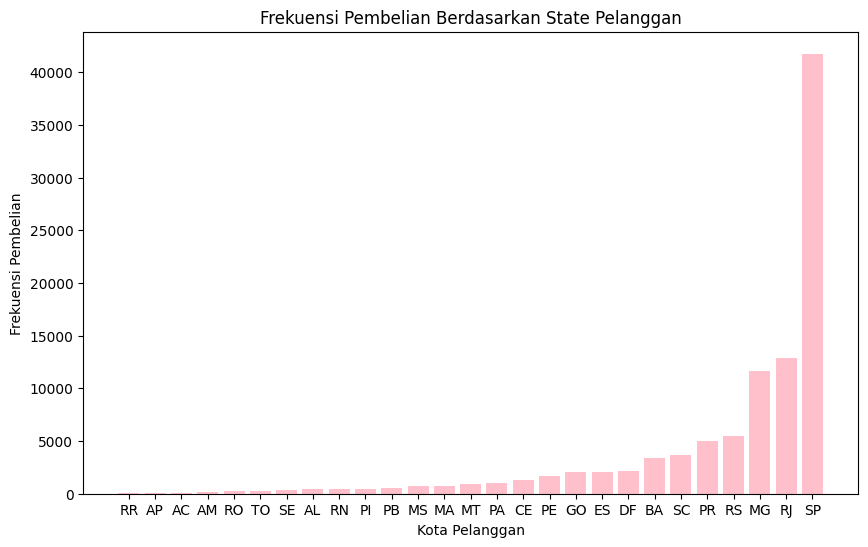

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(purchase_frequency_by_state['customer_state'], purchase_frequency_by_state['purchase_frequency'], color='pink')
plt.title('Frekuensi Pembelian Berdasarkan State Pelanggan')
plt.xlabel('Kota Pelanggan')
plt.ylabel('Frekuensi Pembelian')
plt.show()

Mengambil 5 State Teratas

In [ ]:
top_states = purchase_frequency_by_state.head(5)

Horizontal Plot Untuk Menampilkan Frekuensi Pembelian 5 State Tertinggi

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(top_states['customer_state'], top_states['purchase_frequency'], color='pink')
plt.title('Frekuensi Pembelian 5 State Terendah')
plt.xlabel('Frekuensi Pembelian')
plt.ylabel('Kota Pelanggan')
plt.show()

Mengambil 5 States Terbawah

In [ ]:
bottom_states = purchase_frequency_by_state.tail(5)

Horizontal Plot Untuk Menampilkan Frekuensi Pembelian 5 State Terendah.

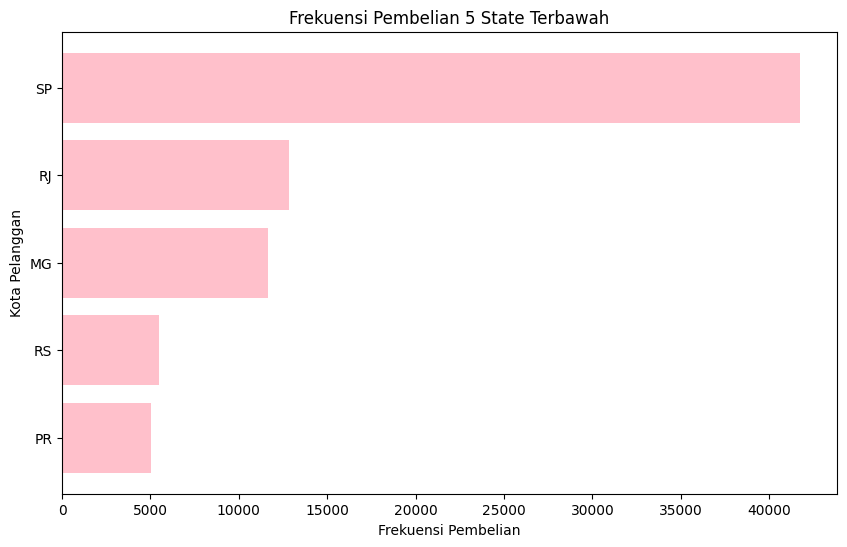

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(bottom_states['customer_state'], bottom_states['purchase_frequency'], color='pink')
plt.title('Frekuensi Pembelian 5 State Terrendah')
plt.xlabel('Frekuensi Pembelian')
plt.ylabel('Kota Pelanggan')
plt.show()

### Bagaimana tingkat kepuasan pelanggan tercermin dari skor ulasan? :

Membuat Pie Chart

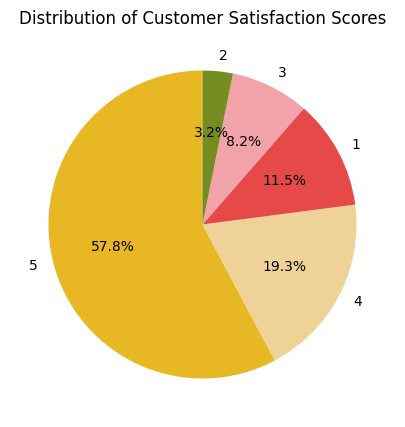

In [ ]:
plt.figure(figsize=(8, 5))
plt.pie(review_df['review_score'].value_counts(), labels=review_df['review_score'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=['#E8B824', '#EFD298', '#E54A48','#F2A2A9', '#758D20'])
plt.title('Distribution of Customer Satisfaction Scores')
plt.show()

Membuat Bar Chart

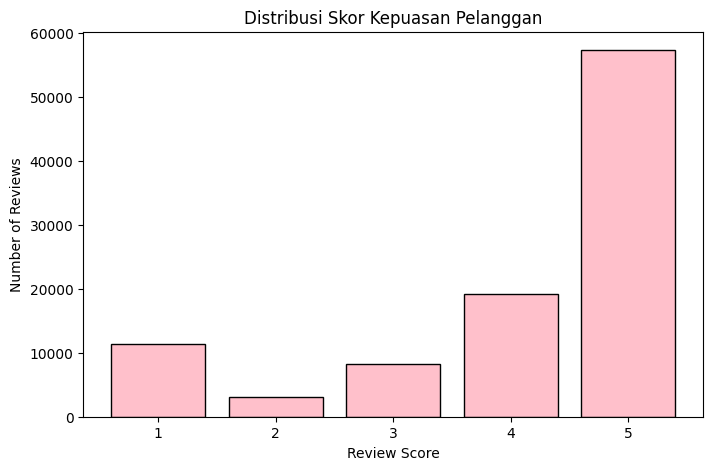

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(review_df['review_score'].value_counts().index, review_df['review_score'].value_counts(), color='pink', edgecolor='black')
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.title('Distribusi Skor Kepuasan Pelanggan')
plt.show()

# Apakah terdapat pengaruh bulan dan tahun terhadap  pembelian?

Menggunakan Heatmap

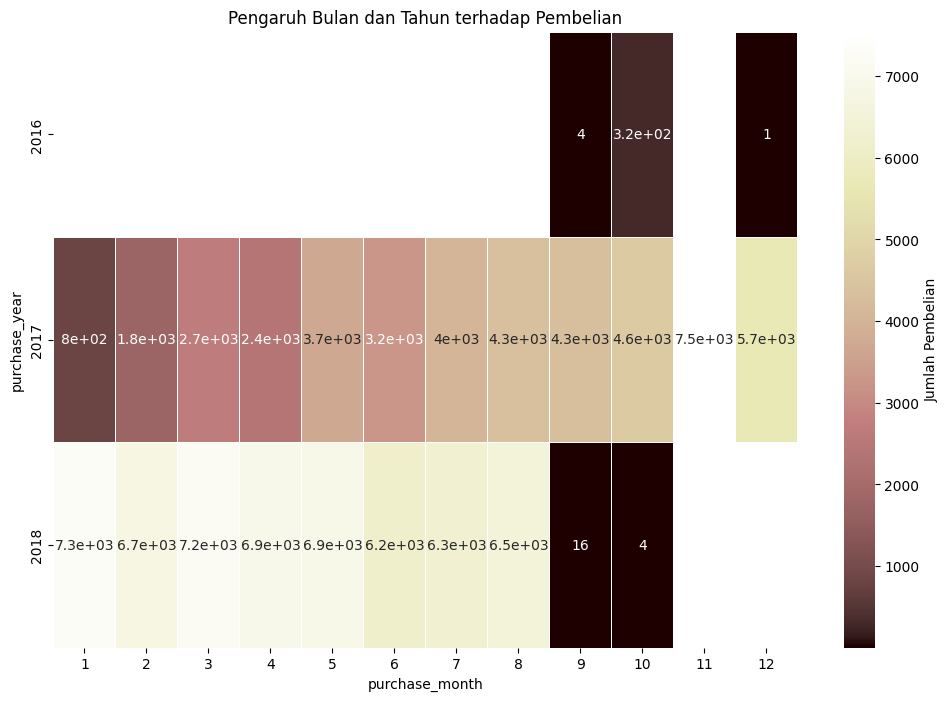

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_yearly_purchase_counts, cmap='pink', annot=True, linewidths=.5, cbar_kws={'label': 'Jumlah Pembelian'})
plt.title('Pengaruh Bulan dan Tahun terhadap Pembelian')
plt.show()

Menggunakan Line Chart

<Figure size 1200x800 with 0 Axes>

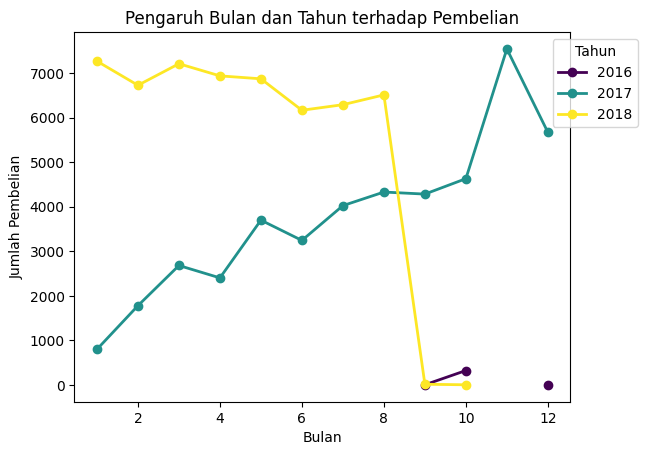

In [ ]:
plt.figure(figsize=(12, 8))
monthly_yearly_purchase_counts.T.plot(kind='line', marker='o', colormap='viridis', linewidth=2)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pembelian')
plt.title('Pengaruh Bulan dan Tahun terhadap Pembelian')
plt.legend(title='Tahun', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

Membuat Line Chart Untuk Penjualan Pada Tahun 2016

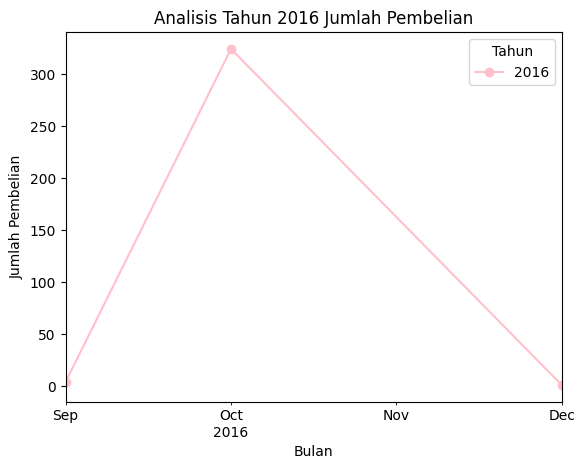

In [ ]:
analysis_2016.plot(label='2016', marker='o', linestyle='-', color='pink')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pembelian')
plt.title('Analisis Tahun 2016 Jumlah Pembelian')
plt.legend(title='Tahun', loc='upper right')
plt.show()

Membuat Line Chart Untuk Penjualan Pada Tahun 2017

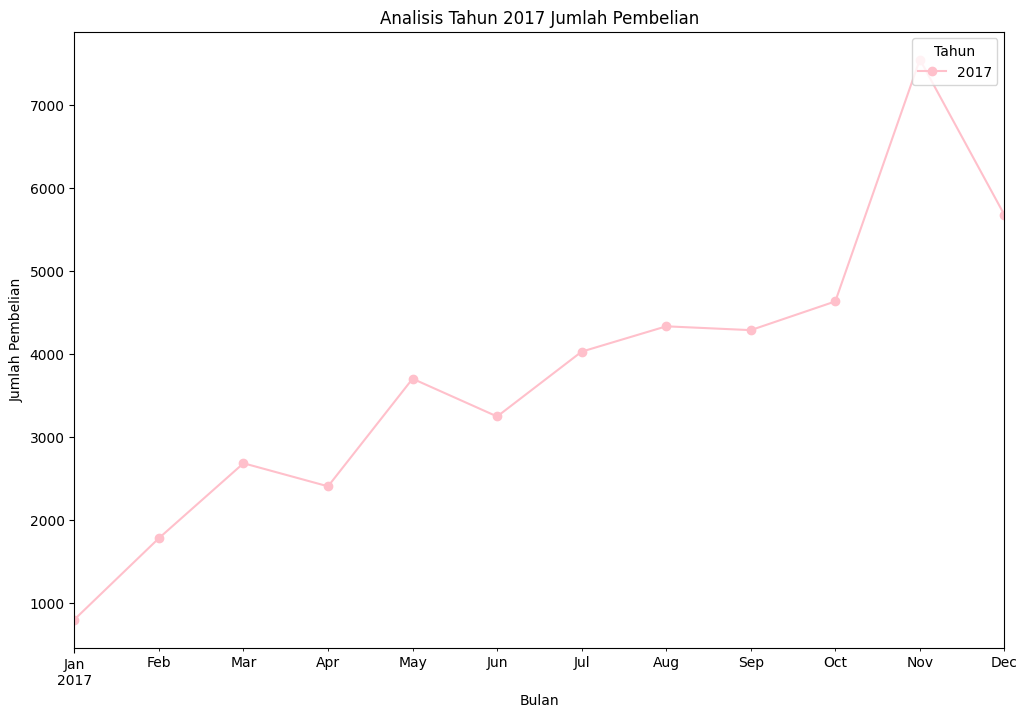

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
analysis_2017.plot(label='2017', marker='o', linestyle='-',color='pink')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pembelian')
plt.title('Analisis Tahun 2017 Jumlah Pembelian')
plt.legend(title='Tahun', loc='upper right')
plt.show()

Membuat Line Chart Untuk Penjualan Pada Tahun 2018

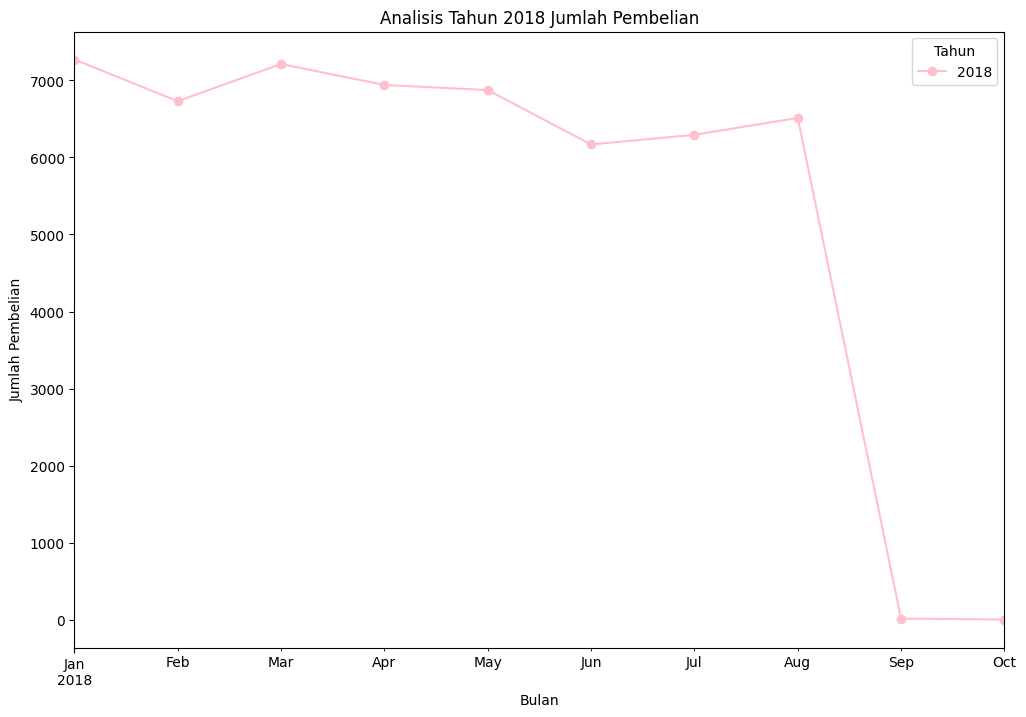

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
analysis_2018.plot(label='2018', marker='o', linestyle='-', color='pink')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pembelian')
plt.title('Analisis Tahun 2018 Jumlah Pembelian')
plt.legend(title='Tahun', loc='upper right')
plt.show()

## Membuat Dashboard

In [ ]:
!pip install streamlit -q

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.121.175.135


In [ ]:
! streamlit run nanda.py & npx localtunnel --port 8501

[..................] \ fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.121.175.135:8501

npx: installed 22 in 1.543s
your url is: https://lemon-birds-report.loca.lt
2024-03-05 08:11:23.301 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 535, in _run_script
    exec(code, module.__dict__)
  File "/content/nanda.py", line 76, in <module>
    order_df["purchase_year"] = order_df["order_purchase_timestamp"].dt.year
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 5902, in __getattr__
    return object.__getattribute__(self, name)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/accessor.py", line 182, in __get__
    accessor_obj = self._accessor(obj)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/

## Conclusion

**Pertanyaan 1**

Kesimpulan

Berdasarkan data frekuensi pembelian pada setiap negara bagian, terlihat bahwa São Paulo (SP) menjadi kontributor utama dengan jumlah pembelian yang sangat tinggi, mencerminkan potensi pasar yang signifikan di wilayah tersebut. Di sisi lain, negara bagian dengan frekuensi pembelian yang lebih rendah, seperti Roraima (RR) atau Acre (AC), mungkin memerlukan perhatian khusus dalam pengembangan strategi pemasaran dan distribusi untuk meningkatkan penetrasi pasar. Analisis ini dapat menjadi landasan bagi perusahaan untuk mengoptimalkan strategi pemasaran, logistik, dan pertumbuhan bisnis, dengan fokus pada negara bagian yang memiliki potensi tinggi atau memerlukan upaya lebih lanjut.



Saran

- Dengan jumlah pembelian yang sangat tinggi di São Paulo, perusahaan sebaiknya mempertahankan fokus dan meningkatkan investasi pemasaran di wilayah ini. Upaya tambahan dapat termasuk kampanye pemasaran yang lebih spesifik dan adaptasi strategi penjualan untuk mencapai potensi pasar yang lebih besar.
- Negara bagian seperti Roraima (RR) atau Acre (AC) yang menunjukkan frekuensi pembelian yang rendah mungkin memerlukan analisis lebih lanjut. Perusahaan perlu menyelidiki penyebab rendahnya aktivitas pembelian di wilayah-wilayah ini dan mengadaptasi strategi pemasaran, termasuk penyesuaian harga, promosi, atau inovasi produk untuk menarik pelanggan.
- Penting untuk terus memantau kinerja strategi yang diterapkan dan secara berkala mengevaluasi data pembelian untuk mengidentifikasi perubahan tren atau perluasan peluang pasar di wilayah-wilayah tertentu.

**Pertanyaan 2**

Kesimpulan

Mayoritas pelanggan cenderung memberikan skor tinggi, terutama skor 5 yang mencapai jumlah 57,328, menunjukkan bahwa sebagian besar pelanggan memberikan penilaian positif terhadap layanan atau produk yang mereka terima. Meskipun skor 5 mendominasi, variasi skor ulasan terlihat dengan skor 4 yang cukup tinggi (19,142) dan skor 3 yang memiliki jumlah yang lebih rendah (8,179). Meski demikian, jumlah pelanggan yang memberikan skor 4 dan 5 secara bersama-sama mencapai 76,470, mengindikasikan tingkat kepuasan pelanggan secara umum yang tinggi. Pentingnya memahami komentar atau feedback dari pelanggan juga ditekankan, karena komentar dapat memberikan wawasan lebih mendalam tentang aspek-aspek spesifik yang memengaruhi tingkat kepuasan pelanggan. Untuk pemahaman yang lebih baik, analisis lebih lanjut dapat dilakukan dengan mempertimbangkan faktor-faktor lain seperti jenis produk atau layanan, waktu pengiriman, dan kebijakan pelayanan pelanggan.

Saran

- Meskipun mayoritas pelanggan memberikan skor tinggi, penting untuk melibatkan analisis lebih lanjut dengan mempertimbangkan faktor-faktor tambahan seperti jenis produk atau layanan, waktu pengiriman, dan kebijakan pelayanan pelanggan. Ini dapat membantu mengidentifikasi area tertentu yang mungkin memerlukan perhatian lebih lanjut untuk meningkatkan pengalaman pelanggan.
- Komentar pelanggan dapat menjadi sumber inspirasi untuk inovasi produk atau layanan baru. Perusahaan dapat mempertimbangkan feedback pelanggan untuk mengembangkan peningkatan atau penyesuaian yang dapat meningkatkan daya tarik produk atau layanan.
- Pemantauan secara teratur terhadap skor dan komentar pelanggan penting untuk menangkap tren atau perubahan persepsi pelanggan. Perusahaan dapat mengimplementasikan tindak lanjut yang sistematis berdasarkan temuan dari analisis, seperti perbaikan operasional atau peningkatan pelatihan karyawan.

**Pertanyaan 3**


Kesimpulan

Berdasarkan data jumlah pembelian per bulan dan tahun, dapat disimpulkan bahwa terdapat pengaruh bulan dan tahun tertentu terhadap aktivitas pembelian. Terjadi peningkatan jumlah pembelian dari tahun 2016 hingga 2018, dengan tren peningkatan yang lebih jelas pada tahun 2017, terutama di bulan-bulan seperti Maret, Mei, Juli, dan November. Puncak pembelian tercapai pada bulan November 2017. Namun, pada tahun 2018, pola pembelian menjadi lebih bervariasi, dengan penurunan yang signifikan di bulan Agustus dan peningkatan di bulan Oktober. Perlu dicatat bahwa terdapat data yang tidak tersedia pada tahun 2016 dan pada beberapa bulan tertentu. Kesimpulan ini memberikan wawasan tentang faktor-faktor yang dapat memengaruhi kegiatan pembelian, namun analisis lebih lanjut dengan mempertimbangkan konteks eksternal dapat memberikan pemahaman yang lebih mendalam.

Saran

- Perusahaan dapat melakukan analisis yang lebih mendalam terhadap tren pembelian per tahun. Fokuskan pada tahun-tahun yang menunjukkan peningkatan signifikan, seperti 2017, untuk memahami apa yang mendorong kenaikan tersebut. Hal ini dapat membantu dalam perencanaan strategis dan pemasaran untuk tahun-tahun mendatang.
- Selain memeriksa tren setiap tahun, perbandingan antar tahun dapat membuka wawasan tambahan. Memahami perbedaan dapat membantu perusahaan menyesuaikan strategi mereka sesuai dengan dinamika pasar yang berubah.